In [5]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

#import packages for Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


In [6]:
df1=pd.read_csv("healthcare-dataset-stroke-data.csv")
df1.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [7]:
df1.shape

(5110, 12)

In [8]:
df1.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [9]:
df1.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [11]:
df2 = df1.drop(['id'],axis='columns')
df2

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [12]:
df2.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [13]:
df2['bmi'].dtype

dtype('float64')

In [14]:
df2['bmi'].fillna(float(df2['bmi'].mean()), inplace=True)
df2.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [15]:
df2.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [16]:
df2.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [17]:
df3 = df2.copy()

In [18]:
df3['stroke'].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

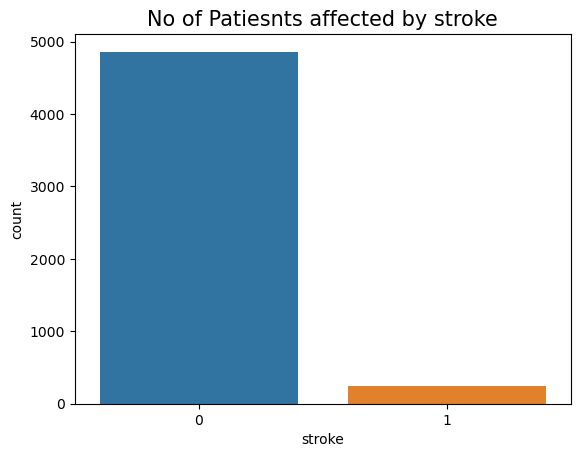

In [19]:
sns.countplot(x=df3['stroke'])
plt.title('No of Patiesnts affected by stroke',fontsize=15)
plt.show()

In [20]:
df3.groupby(['gender'])['stroke'].value_counts()

gender  stroke
Female  0         2853
        1          141
Male    0         2007
        1          108
Other   0            1
Name: count, dtype: int64

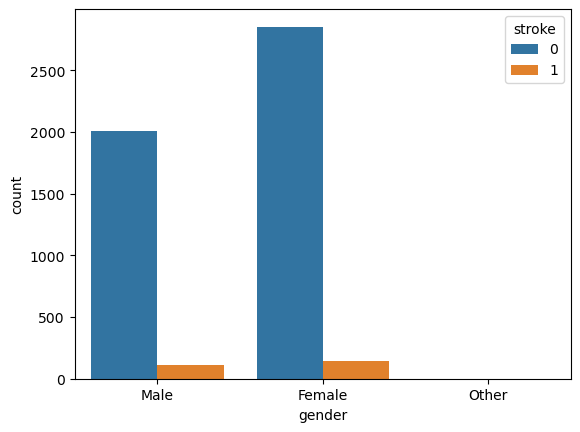

In [21]:
sns.countplot(x=df3['gender'],hue=df3['stroke'])
plt.show()

In [22]:
df3.groupby(['hypertension'])['stroke'].value_counts()

hypertension  stroke
0             0         4429
              1          183
1             0          432
              1           66
Name: count, dtype: int64

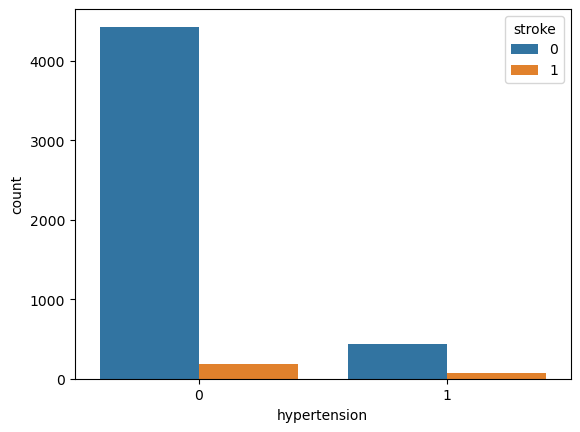

In [23]:
sns.countplot(x=df3['hypertension'],hue=df3['stroke'])
plt.show()

In [24]:
df3.groupby(['heart_disease'])['stroke'].value_counts()

heart_disease  stroke
0              0         4632
               1          202
1              0          229
               1           47
Name: count, dtype: int64

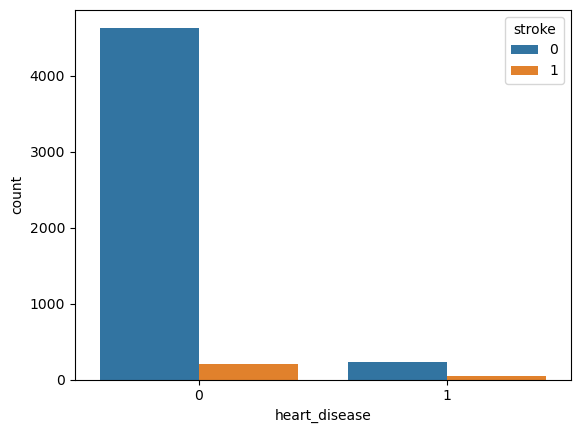

In [25]:
sns.countplot(x=df3['heart_disease'],hue=df3['stroke'])
plt.show()

In [26]:
df3.groupby(['ever_married'])['stroke'].value_counts()

ever_married  stroke
No            0         1728
              1           29
Yes           0         3133
              1          220
Name: count, dtype: int64

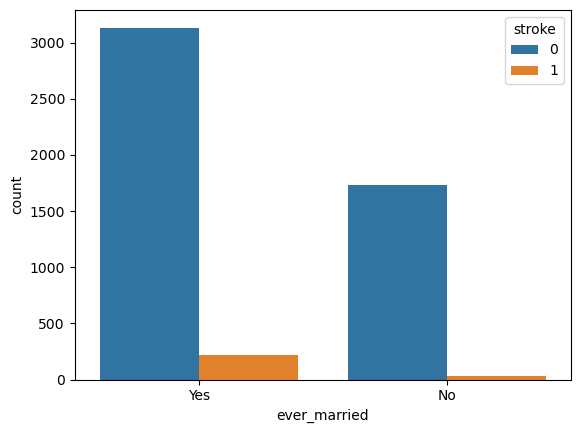

In [27]:
sns.countplot(x=df3['ever_married'],hue=df3['stroke'])
plt.show()

In [28]:
df3.groupby(['work_type'])['stroke'].value_counts()

work_type      stroke
Govt_job       0          624
               1           33
Never_worked   0           22
Private        0         2776
               1          149
Self-employed  0          754
               1           65
children       0          685
               1            2
Name: count, dtype: int64

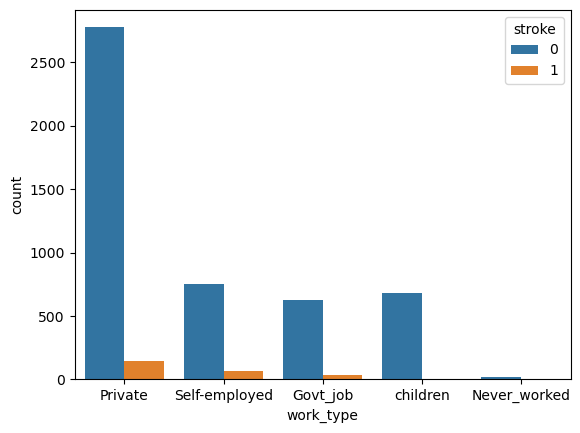

In [29]:
sns.countplot(x=df3['work_type'],hue=df3['stroke'])
plt.show()

In [30]:
df3.groupby(['Residence_type'])['stroke'].value_counts()

Residence_type  stroke
Rural           0         2400
                1          114
Urban           0         2461
                1          135
Name: count, dtype: int64

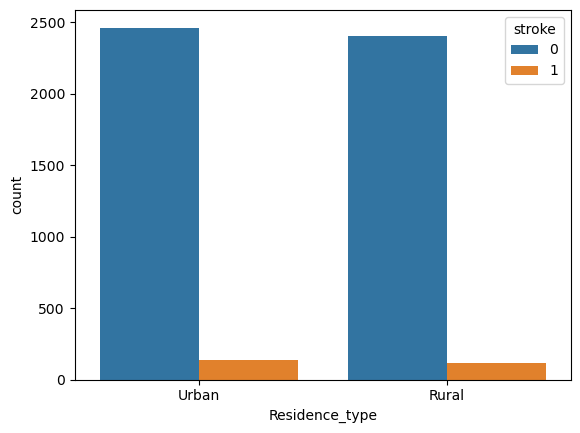

In [31]:
sns.countplot(x=df3['Residence_type'],hue=df3['stroke'])
plt.show()

In [32]:
df3.groupby(['smoking_status'])['stroke'].value_counts()

smoking_status   stroke
Unknown          0         1497
                 1           47
formerly smoked  0          815
                 1           70
never smoked     0         1802
                 1           90
smokes           0          747
                 1           42
Name: count, dtype: int64

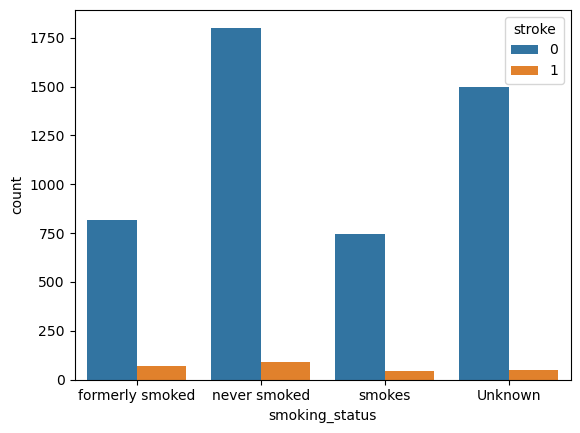

In [33]:
sns.countplot(x=df3['smoking_status'],hue=df3['stroke'])
plt.show()

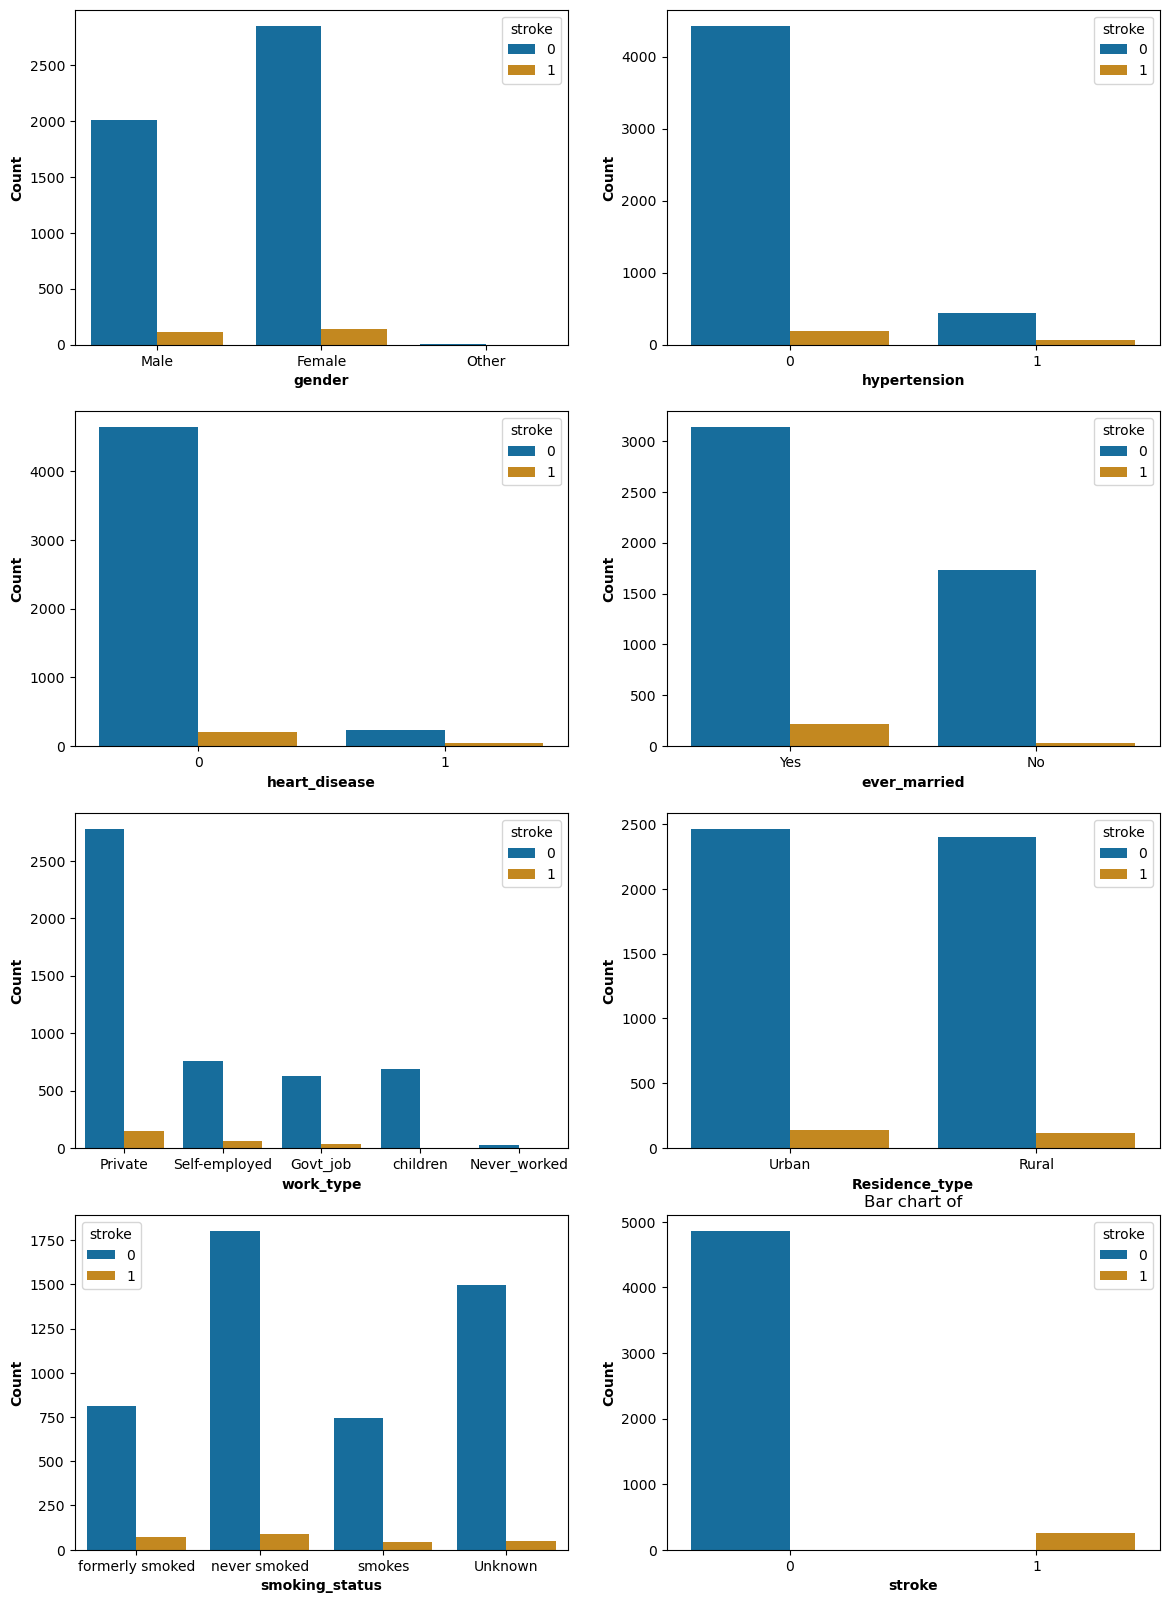

In [34]:
import seaborn as sns
cate_var = ['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status', 'stroke']

fig, axs = plt.subplots(4, 2, figsize=(14,20))
axs = axs.flatten()

# iterate through each column of df_catd and plot
for i, col_name in enumerate(cate_var):
    sns.countplot(x=col_name, data=df3, ax=axs[i], hue =df3['stroke'], palette = 'colorblind')
    plt.title("Bar chart of")
    axs[i].set_xlabel(f"{col_name}", weight = 'bold')
    axs[i].set_ylabel('Count', weight='bold')

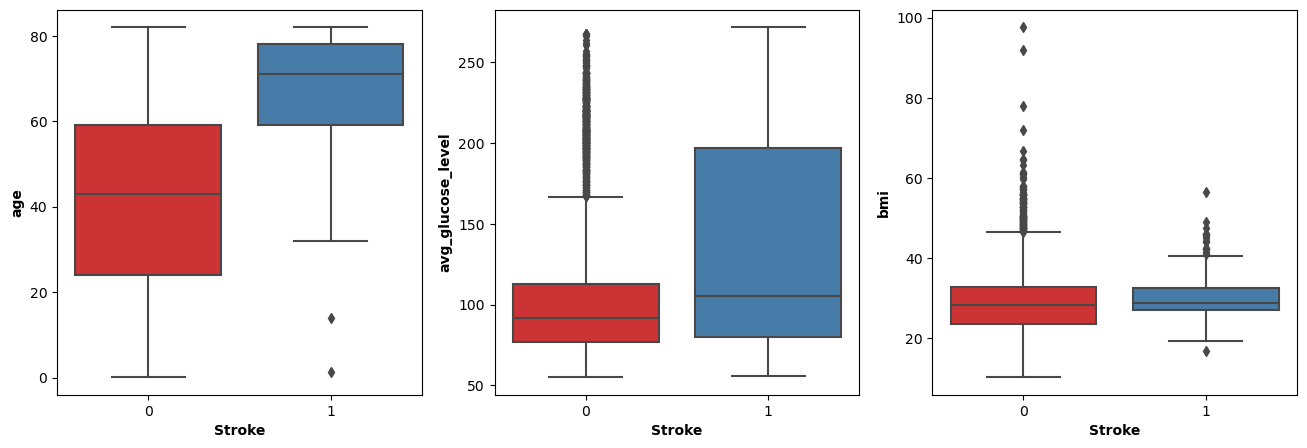

In [35]:
num_var = ['age', 'avg_glucose_level', 'bmi']

fig, axs = plt.subplots(1, 3, figsize=(16,5))
axs = axs.flatten()

# iterate through each column in df_num and plot
for i, col_name in enumerate(num_var):
    sns.boxplot(x="stroke", y=col_name, data=df3, ax=axs[i],  palette = 'Set1')
    axs[i].set_xlabel("Stroke", weight = 'bold')
    axs[i].set_ylabel(f"{col_name}", weight='bold')

From the above boxplot, some observations can be drawn:
age subjects with stroke tends to have higher mean age.
avg glucose level subjects with stroke tends to have higher average glucose level.
bmi index does not give much indication on the likelihood of experiencing stroke.
bmi index for super obesity is 50.
Outliers in this feature should be replaced to its highest limit (50).

In [36]:
bmi_outliers=df3.loc[df3['bmi']>50]
bmi_outliers['bmi'].shape

(79,)

In [37]:
df4 = df3.copy()

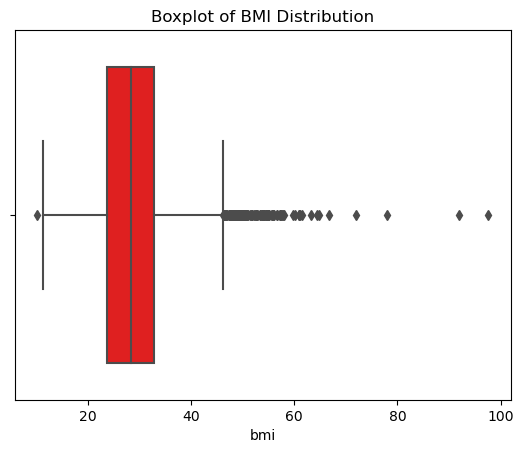

In [38]:
sns.boxplot(data=df4,x=df4["bmi"],color='red')
plt.title("Boxplot of BMI Distribution");

In [39]:
df4["bmi"] = pd.to_numeric(df4["bmi"])
df4["bmi"] = df4["bmi"].apply(lambda x: 50 if x>50 else x)

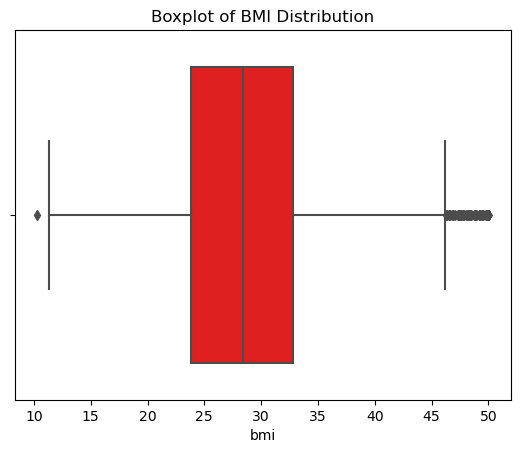

In [40]:
sns.boxplot(data=df4,x=df4["bmi"],color='red')
plt.title("Boxplot of BMI Distribution");

In [41]:
df1['bmi'].fillna(df1['bmi'].mean(),inplace=True) #Filling the missing values of BMI with the mean values

In [42]:
df1.head(2)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1


In [43]:
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
labelEncoder = LabelEncoder()
df1['gender'] = labelEncoder.fit_transform(df1['gender'])
df1['ever_married'] = labelEncoder.fit_transform(df1['ever_married'])
df1['work_type'] = labelEncoder.fit_transform(df1['work_type'])
df1['Residence_type'] = labelEncoder.fit_transform(df1['Residence_type'])

In [44]:
df1.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [45]:
print(df1.smoking_status.value_counts())
print(df1[df1.smoking_status.isnull()]['stroke'].value_counts())

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64
Series([], Name: count, dtype: int64)


In [46]:
df1.drop('smoking_status',axis = 1, inplace = True)

In [47]:
df1.drop('id',axis = 1, inplace = True)

In [48]:
df1 = df1.sample(frac=1,random_state=4)
df_Isstroke = df1.loc[df1['stroke'] == 1]
df_Nostroke = df1.loc[df1['stroke'] == 0].sample(n= 4500,random_state= 101)

In [49]:
df_data_stroke = pd.concat([df_Isstroke,df_Nostroke])

In [50]:
df_data_stroke.stroke.value_counts()

stroke
0    4500
1     249
Name: count, dtype: int64

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
df_data_stroke = shuffle(df_data_stroke)
X = df_data_stroke.drop('stroke', axis = 1)
y = df_data_stroke['stroke']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=101)

In [53]:
model_1 = LogisticRegression(solver='liblinear')
model_1.fit(X_train, y_train)
lra=model_1.score(X_test, y_test)
lra

0.9452631578947368

In [54]:
lr_pred = model_1.predict(X_test)

In [55]:
model_2 = tree.DecisionTreeClassifier(criterion='entropy')
model_2.fit(X_train, y_train)
dtc=model_2.score(X_train, y_train)
dtc

1.0

In [56]:
dt_pred = model_2.predict(X_test)

In [57]:
model_3 = RandomForestClassifier(n_estimators=30)
model_3.fit(X_train, y_train)
rfc=model_3.score(X_test, y_test)
rfc

0.9442105263157895

In [58]:
rf_pred =model_3.predict(X_test)

In [59]:
model_4 = SVC()
model_4.fit(X_train, y_train)
svc=model_4.score(X_test, y_test)
svc

0.9452631578947368

In [60]:
svc_pred = model_4.predict(X_test)

In [61]:
accuracy = [lra,dtc,rfc,svc]
allmodels = ['LogisticRegression','DecisonTreeClassifier','RandomForestClassifier','SVC']

score_df = pd.DataFrame({'Algorithms': allmodels, 'Accuracy_Score': accuracy})
score_df.style.background_gradient(cmap="YlGnBu",high=1,axis=0)

,Algorithms,Accuracy_Score
0,LogisticRegression,0.945263
1,DecisonTreeClassifier,1.000000
2,RandomForestClassifier,0.944211
3,SVC,0.945263


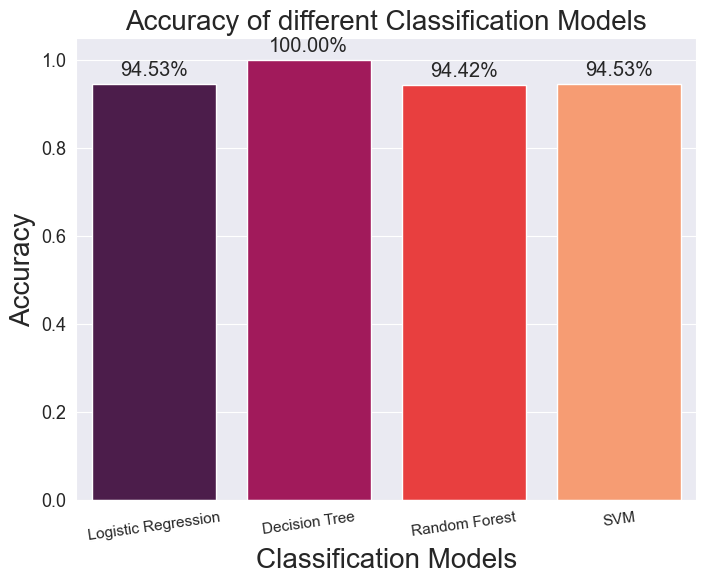

In [62]:
mylist=[]
mylist2=[]
mylist.append(lra)
mylist2.append("Logistic Regression")
mylist.append(dtc)
mylist2.append("Decision Tree")
mylist.append(rfc)
mylist2.append("Random Forest")
mylist.append(svc)
mylist2.append("SVM")
plt.rcParams['figure.figsize']=8,6
sns.set_style("darkgrid")
ax = sns.barplot(x=mylist2, y=mylist, palette = "rocket", saturation =1.5)
plt.xlabel("Classification Models", fontsize = 20 )
plt.ylabel("Accuracy", fontsize = 20)
plt.title("Accuracy of different Classification Models", fontsize = 20)
plt.xticks(fontsize = 11, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

In [63]:
test_data = model_2.predict(([[1,79.0,0,1,1,2,1,213.38,28.893237]]))
if test_data[0] == 1:
    print("This patient Sffected by Stroke")
else:
    print("This Patient Not Affected BY Stroke")

This Patient Not Affected BY Stroke


In [64]:
test_data = model_2.predict(([[0,76.0,0,0,1,2,1,57.92,28.893237]]))
if test_data[0] == 1:
    print("This patient Sffected by Stroke")
else:
    print("This Patient Not Affected BY Stroke")

This patient Sffected by Stroke


In [65]:
test_data = model_2.predict(([[0,41.0,0,0,1,2,0,92.64,43.8]]))
if test_data[0] == 1:
    print("This patient Sffected by Stroke")
else:
    print("This Patient Not Affected BY Stroke")

This Patient Not Affected BY Stroke


In [66]:
test_data = model_2.predict(([[0,57.0,0,0,1,0,1,97.39,38.0]]))
if test_data[0] == 1:
    print("This patient Affected by Stroke")
else:
    print("This Patient Not Affected BY Stroke")

This Patient Not Affected BY Stroke
